# Data Mining Course Project

* Recep Oğuzhan Çetin 16050111050 
* Oğuzhan Baş 18050121001
* Muhammet Emin Yüce 16050111021

## About the Dataset

>This is a simulated credit card transaction dataset containing legitimate
and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. 
It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_x = pd.read_csv("fraud_data.csv")
df = df_x.head(10000) #till 10k
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,1
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,1
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             9999 non-null   int64  
 1   trans_date_trans_time  9999 non-null   object 
 2   cc_num                 9999 non-null   int64  
 3   merchant               9999 non-null   object 
 4   category               9999 non-null   object 
 5   amt                    9999 non-null   float64
 6   first                  9999 non-null   object 
 7   last                   9999 non-null   object 
 8   gender                 9999 non-null   object 
 9   street                 9999 non-null   object 
 10  city                   9999 non-null   object 
 11  state                  9999 non-null   object 
 12  zip                    9999 non-null   int64  
 13  lat                    9999 non-null   float64
 14  long                   9999 non-null   float64
 15  city

In [3]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.00000,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000
mean,4999.000000,4.096929e+17,66.771170,48539.533853,38.455995,-90.01384,9.635047e+04,1.371927e+09,38.441725,-90.013207,0.003100
std,2886.607005,1.300136e+18,124.111135,26703.561407,5.119889,13.57445,3.252525e+05,6.322632e+04,5.153869,13.590470,0.055597
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.67230,2.300000e+01,1.371817e+09,19.163455,-166.464422,0.000000
25%,2499.500000,1.800429e+14,9.200000,26237.000000,34.502500,-96.61840,7.950000e+02,1.371873e+09,34.593980,-96.632882,0.000000
50%,4999.000000,3.518669e+15,43.860000,48034.000000,39.303600,-86.96570,2.836000e+03,1.371926e+09,39.290940,-87.230812,0.000000
75%,7498.500000,4.634956e+15,80.025000,72011.000000,41.948800,-80.17520,2.230500e+04,1.371986e+09,41.983602,-80.268407,0.000000
max,9998.000000,4.992346e+18,3344.720000,99783.000000,65.689900,-67.95030,2.906700e+06,1.372032e+09,65.951727,-67.122946,1.000000


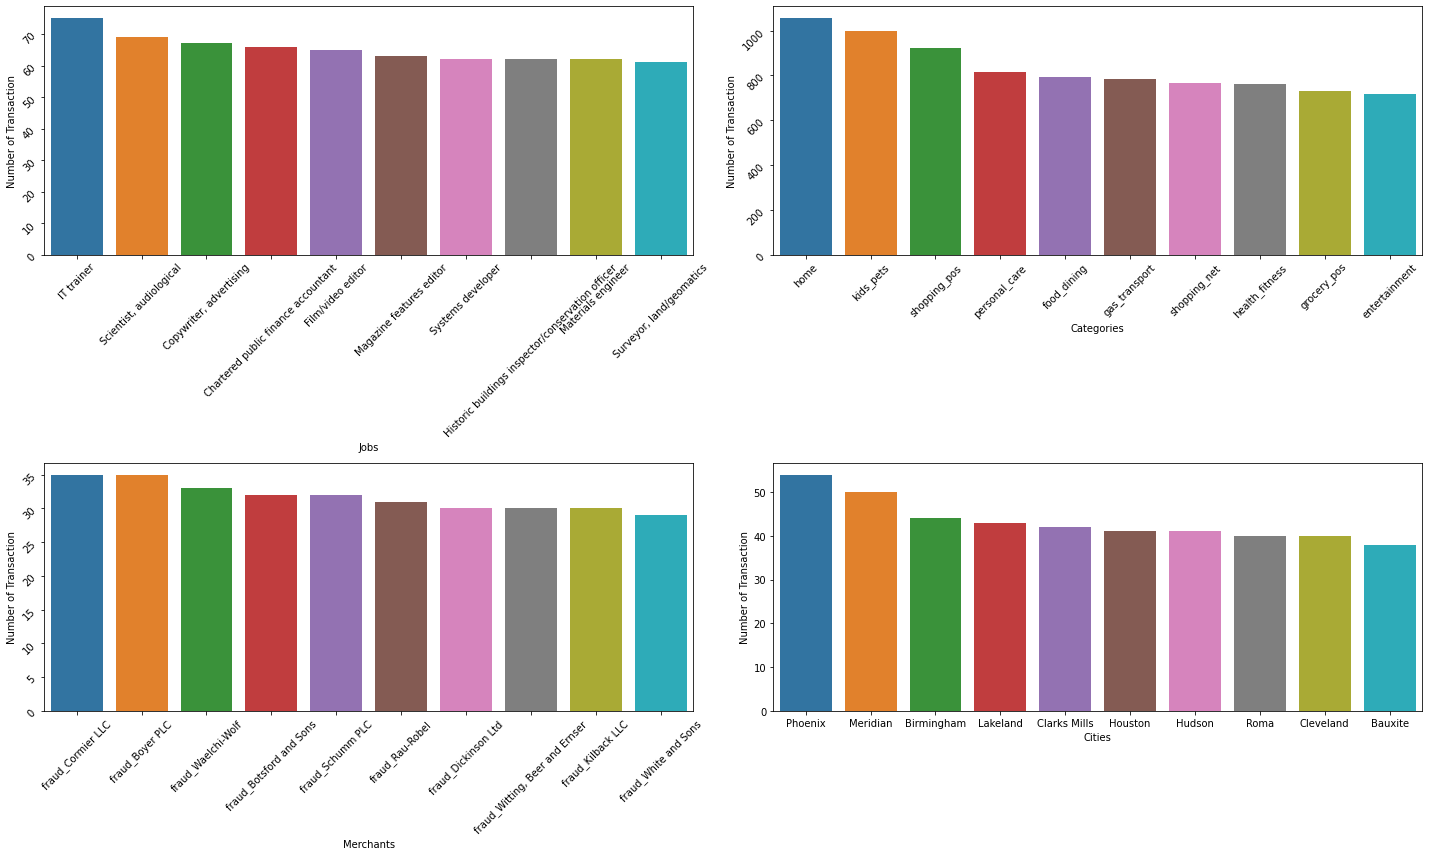

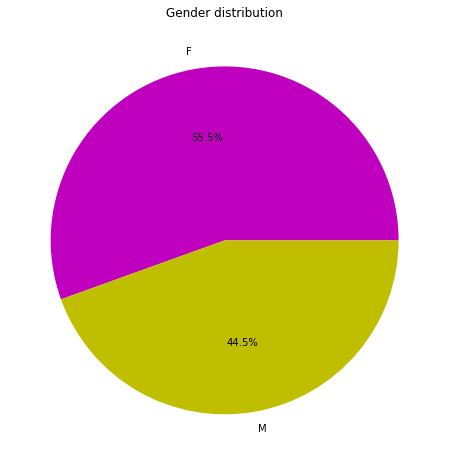

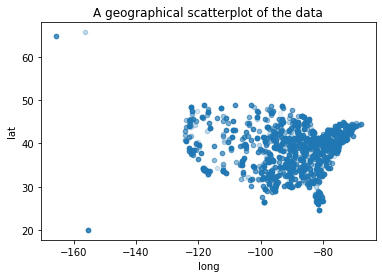

In [4]:
# Let's investigate our data

df = df.drop(["Unnamed: 0"], axis=1) # this column is useless

# Let's find the most 10 jobs of people made transaction, top 10 categories, merchants and cities

n = 10
jobs = df["job"].value_counts()[:n]
categories = df["category"].value_counts()[:n]
merchants = df["merchant"].value_counts()[:n]
cities = df["city"].value_counts()[:n]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

sns.barplot(ax=axes[0][0], x = jobs.index, y = jobs.values) # Scatter plot 1 data
axes[0, 0].set(xlabel="Jobs", ylabel="Number of Transaction")
axes[0,0].tick_params(labelrotation=45)          

sns.barplot(ax=axes[0,1], x = categories.index, y = categories.values) # Scatter plot 1 data
axes[0, 1].set(xlabel="Categories", ylabel="Number of Transaction")
axes[0,1].tick_params(labelrotation=45)  

sns.barplot(ax=axes[1,0], x = merchants.index, y = merchants.values) # Scatter plot 1 data
axes[1, 0].set(xlabel="Merchants", ylabel="Number of Transaction")
axes[1,0].tick_params(labelrotation=45)

sns.barplot(ax=axes[1,1], x = cities.index, y = cities.values) # Scatter plot 1 data
axes[1,1].set(xlabel="Cities", ylabel="Number of Transaction")

fig.tight_layout()

# Gender distribution of transactors
labels = df.gender.value_counts().index
colors = ['m', 'y']
explode = [0,0]
sizes = df.gender.value_counts().values

#visualization
plt.figure(figsize = (8,8))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%.1f%%')
plt.title('Gender distribution', color = 'black',fontsize = 12)
plt.show()


# Longtitude Attitude
df.plot(kind="scatter", x="long", y="lat", alpha=0.1)
plt.title("A geographical scatterplot of the data")
plt.show()

# Outlier removal

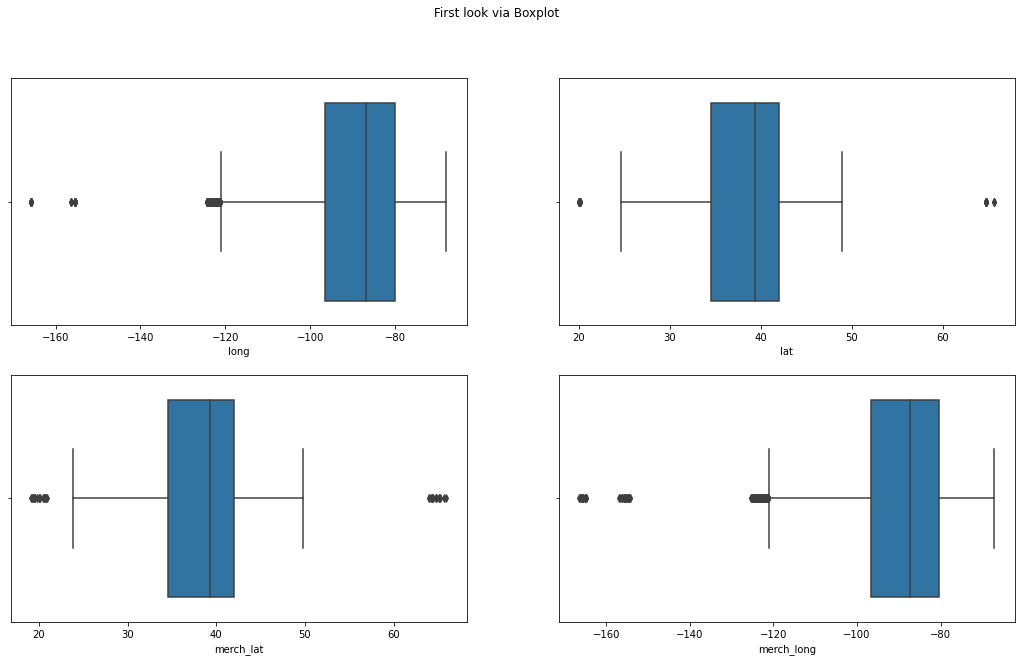

In [5]:
# Let's see box plot of some of columns

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('First look via Boxplot')

sns.boxplot(ax=axes[0, 0], x=df["long"])
sns.boxplot(ax=axes[0, 1], x=df["lat"])
sns.boxplot(ax=axes[1, 0], x=df["merch_lat"])
sns.boxplot(ax=axes[1, 1], x=df["merch_long"])
plt.show()


In [6]:
Q1 = df[["amt","lat","long","merch_lat","merch_long"]].quantile(0.25)
Q3 = df[["amt","lat","long","merch_lat","merch_long"]].quantile(0.75)
IQR = Q3 - Q1

new_df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
new_df.shape

(9132, 22)

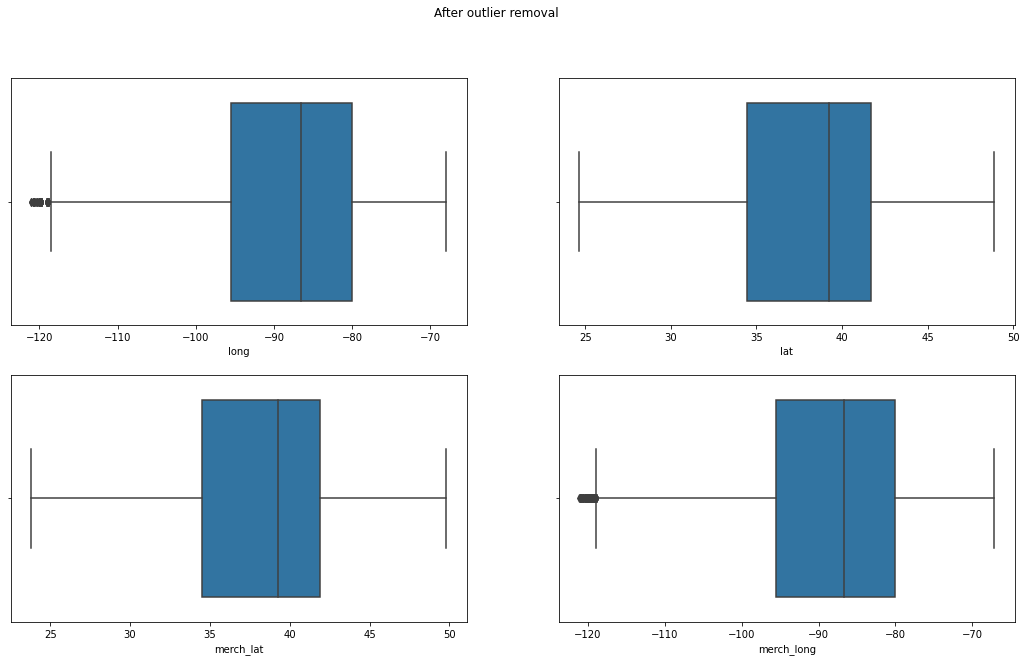

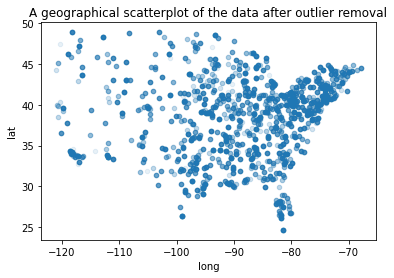

In [7]:
# Let's see box plot of same columns visualized before

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('After outlier removal')

sns.boxplot(ax=axes[0, 0], x=new_df["long"])
sns.boxplot(ax=axes[0, 1], x=new_df["lat"])
sns.boxplot(ax=axes[1, 0], x=new_df["merch_lat"])
sns.boxplot(ax=axes[1, 1], x=new_df["merch_long"])
plt.show()

# Longtitude Attitude
new_df.plot(kind="scatter", x="long", y="lat", alpha=0.1)
plt.title("A geographical scatterplot of the data after outlier removal")
plt.show()

# Limiting data for 3D Plotting - Comment this Section to train with whole data

In [8]:
df_for_rule_mining = new_df.head(2000)
# This is for 3D Plotting
target0_df = new_df.loc[new_df['is_fraud'] == 0]
target1_df = new_df.loc[new_df['is_fraud'] != 0]
target0s = target0_df.head(2000)
frame = [target0s, target1_df]
new_df = pd.concat(frame)
new_df.shape

(2014, 22)

# Sifting the useful features

In [9]:
new_df.dropna(inplace = True)
#useful_features = new_df[['merchant','category','amt','first','last','gender','lat','long','job','merch_lat','merch_long','is_fraud']]
useful_features = new_df[['category','amt','gender','lat','long','job','merch_lat','merch_long']]
target = np.array(new_df[['is_fraud']])
print(useful_features.dtypes)
print(target.shape, useful_features.shape)



category       object
amt           float64
gender         object
lat           float64
long          float64
job            object
merch_lat     float64
merch_long    float64
dtype: object
(2014, 1) (2014, 8)


In [10]:
type(useful_features)

pandas.core.frame.DataFrame

# Preprocessing of the useful data

In [11]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler

#Scale the numeric data,Encode the text data
preprocess = make_column_transformer(
    (StandardScaler(),['amt', 'lat', 'long', 'merch_lat', 'merch_long']),
    (OneHotEncoder(),['gender']),
    (OrdinalEncoder(),['category','job'])
)

features = preprocess.fit_transform(useful_features)

# Label Encoding the target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target.flatten())



# Pca implementation

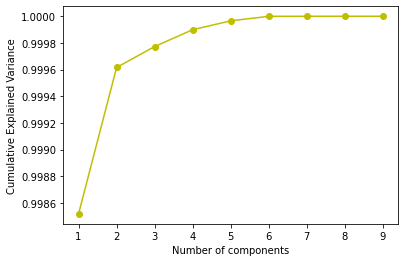

In [12]:
from sklearn.decomposition import PCA
# Demonstration of PCA

pca = PCA()
pca.fit(features)

size = pca.explained_variance_ratio_.shape[0]

# How to choose the best value for "number of components"
x = np.arange(1, size+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)


plt.plot(x, y, marker='o', color='y')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

## Pca implementation - Selecting 3 components

In [13]:
pca = PCA(n_components = 3)

pca.fit(features)
pca_scores = pca.transform(features)

#Train test Split
X_train, X_test, y_train, y_test = train_test_split(pca_scores, target, random_state=0, train_size = 0.75)

# Pca 3D Visualization

In [14]:
scoresDf = pd.DataFrame(data = pca_scores, columns= ["Component1","Component2","Component3"])
scoresDf.insert(0,"Target",target)
#scoresDf

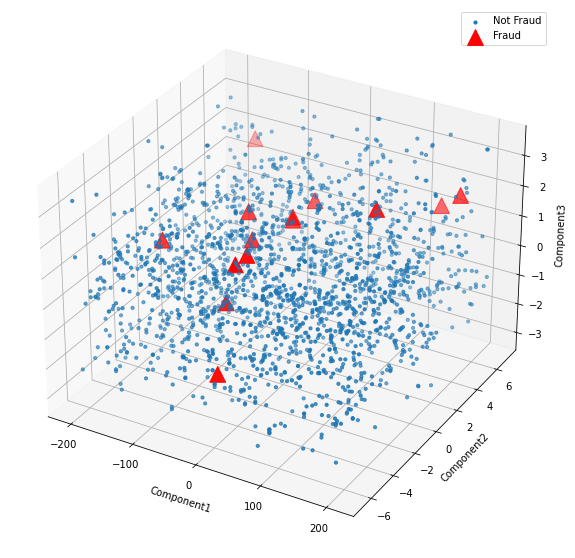

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Not Fraud Components
cmp_1 = scoresDf.loc[scoresDf['Target'] == 0]['Component1']
cmp_2 = scoresDf.loc[scoresDf['Target'] == 0]['Component2']
cmp_3 = scoresDf.loc[scoresDf['Target'] == 0]['Component3']
# Fraud Components
_cmp_1 = scoresDf.loc[scoresDf['Target'] == 1]['Component1']
_cmp_2 = scoresDf.loc[scoresDf['Target'] == 1]['Component2']
_cmp_3 = scoresDf.loc[scoresDf['Target'] == 1]['Component3']

fig = plt.figure(figsize=(18, 10))
ax = fig.gca(projection='3d')
ax.scatter(cmp_1, cmp_2, cmp_3, cmap = cm.gray, s = 10, label='Not Fraud') # Not Fraud
ax.scatter(_cmp_1, _cmp_2, _cmp_3, c='red', marker='^',s = 250, label='Fraud') # Fraud
ax.set_xlabel('Component1')
ax.set_ylabel('Component2')
ax.set_zlabel('Component3')
ax.legend()
plt.show()

# K-means clustering with PCA

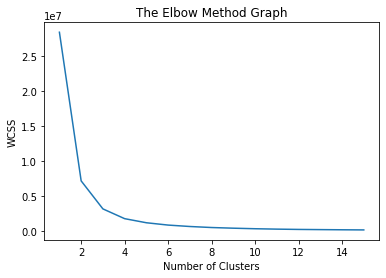

In [16]:
from sklearn.cluster import KMeans

# For K-means we need to determine the number of clusters, to be able to do this let's run an algorithm to find best solution

wcss = [] # Within-Cluster-Sum-of-Squares (WCSS)

for i in range(1,16):   # 15 clusters
    kmeans_with_pca = KMeans(n_clusters = i, init = "k-means++", random_state=30)
    kmeans_with_pca.fit(pca_scores)
    wcss.append(kmeans_with_pca.inertia_)
    
# then plot the elbow graph

plt.plot(range(1,16), wcss)
plt.title("The Elbow Method Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
# 4 clusters is suitable because after 4 clusters graph becomes much smoother

kmeans_with_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state=30)
kmeans_with_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=30)

In [18]:
# Let's assemble original data and PCA components and clusters.
df_copy = new_df.copy()
final_df = pd.concat([df_copy.reset_index(drop=True),scoresDf.reset_index(drop=True)], axis=1)
final_df["Cluster K-means PCA"] = kmeans_with_pca.labels_
final_df["Segment"] = final_df["Cluster K-means PCA"].map({0:"first", 1:"second",2:"third",3:"fourt"})
final_df.shape

(2014, 28)

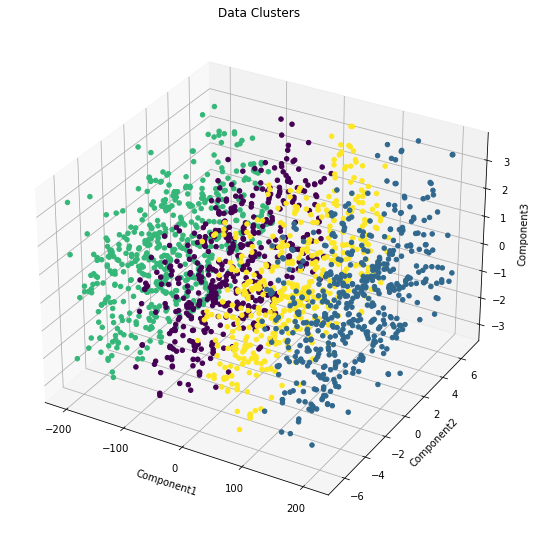

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)

# plot
sc = ax.scatter(final_df["Component1"], final_df["Component2"], final_df["Component3"], c=final_df["Cluster K-means PCA"], alpha=1)
ax.set_xlabel('Component1')
ax.set_ylabel('Component2')
ax.set_zlabel('Component3')
plt.title("Data Clusters")
plt.show()

# Supervised Learning - Training Part 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.evaluate import bias_variance_decomp

#If you want to run this part delete some of the classifier and corresponding names from below because it will take long time

names = [#"Linear SVM",#"Poly kernel SVM","Rbf Kernel SVM",
            "Nearest Neighbors",
         "Decision Tree", "Random Forest",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3,n_jobs=-1),
    #SVC(kernel="linear"), ### These classifiers takes too long to train
    #SVC(kernel="poly"), ### These classifiers takes too long to train
    #SVC(kernel="rbf"), ### These classifiers takes too long to train
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB()]
score = []

for name, clf in zip(names, classifiers):
    #clf.fit(X_train,y_train)
    # estimate bias and variance
    mse, bias, variance = bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='mse', num_rounds=10, random_seed=3)
    # summarize results
    print(name)
    print('MSE: %f' % mse)
    print('Bias: %f' % bias)
    print('Variance: %f\n' % variance)
    score.append(clf.score(X_test, y_test))

Nearest Neighbors
MSE: 0.011706
Bias: 0.008591
Variance: 0.003115

Decision Tree
MSE: 0.010516
Bias: 0.007520
Variance: 0.002996

Random Forest
MSE: 0.008532
Bias: 0.007996
Variance: 0.000536

Naive Bayes
MSE: 0.007937
Bias: 0.007937
Variance: 0.000000



In [21]:
print(score)

[0.9920634920634921, 0.9920634920634921, 0.9920634920634921, 0.9920634920634921]


# Supervised Learning - Selecting best model 

In [22]:
#Random Forest and Naive Bayes are both good in accuracy and Bias Variance tradeoff
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

best_classifier = DecisionTreeClassifier(max_depth=10)
cv_scores = cross_val_score(best_classifier,X_train , y_train, cv=5)
print(cv_scores)

[0.99006623 0.98675497 0.99337748 0.99006623 0.99006623]


# Association Rule Mining

In [23]:
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [24]:
df_for_rule_mining['name']= df_for_rule_mining['first'] + ' ' + df_for_rule_mining['last']
rule_df = df_for_rule_mining[['merchant','name','category','city','job']]
num_of_transaction = rule_df.shape[0]
num_of_columns = rule_df.shape[1] #total number of columns in each transaction

#Getting the list of transactions from the dataset
transactions = []
for i in range(0, num_of_transaction):
    transactions.append([str(rule_df.values[i,j]) for j in range(0, num_of_columns-1)])

In [25]:
print(transactions[1])

['fraud_Sporer-Keebler', 'Joanne Williams', 'personal_care', 'Altonah']


In [26]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
data = pd.DataFrame(te_ary, columns=te.columns_)
data

,Aaron Murray,Aaron Pena,Aaron Rogers,Aaron Stewart,Achille,Acworth,Adam Kirk,Adam Mcdonald,Adam Riddle,Adam Santos,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
apriori(data, min_support=0.0036)

,support,itemsets
0,0.0045,(9)
1,0.0040,(30)
2,0.0045,(66)
3,0.0040,(104)
4,0.0040,(106)
...,...,...
157,0.0040,"(1899, 1828)"
158,0.0040,"(1840, 1898)"
159,0.0045,"(1867, 1900)"
160,0.0045,"(1899, 1878)"


In [28]:
apriori(data, min_support=0.0036, use_colnames=True)

,support,itemsets
0,0.0045,(Adam Santos)
1,0.0040,(Allison Ayala)
2,0.0045,(Anna Logan)
3,0.0040,(Baton Rouge)
4,0.0040,(Bauxite)
...,...,...
157,0.0040,"(home, fraud_Terry Ltd)"
158,0.0040,"(health_fitness, fraud_Torphy-Kertzmann)"
159,0.0045,"(fraud_Weimann-Lockman, kids_pets)"
160,0.0045,"(home, fraud_Windler, Goodwin and Kovacek)"


In [29]:
frequent_itemsets = apriori(data, min_support=0.0036, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.0045,(Adam Santos),1
1,0.0040,(Allison Ayala),1
2,0.0045,(Anna Logan),1
3,0.0040,(Baton Rouge),1
4,0.0040,(Bauxite),1
...,...,...,...
157,0.0040,"(home, fraud_Terry Ltd)",2
158,0.0040,"(health_fitness, fraud_Torphy-Kertzmann)",2
159,0.0045,"(fraud_Weimann-Lockman, kids_pets)",2
160,0.0045,"(home, fraud_Windler, Goodwin and Kovacek)",2


In [30]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.0036) ]

,support,itemsets,length
104,0.0045,"(Glendale, Adam Santos)",2
105,0.0040,"(Allison Ayala, Fort Myers)",2
106,0.0045,"(Cleveland, Anna Logan)",2
107,0.0040,"(Jenna Brooks, Baton Rouge)",2
108,0.0040,"(Kimberly Gonzalez, Bauxite)",2
109,0.0070,"(Bowdoin, Mark Wood)",2
110,0.0045,"(Brooklyn, Judy Hogan)",2
111,0.0045,"(Kingsford Heights, Carrie Washington)",2
112,0.0040,"(Centerview, Lindsay Wilson)",2
113,0.0040,"(Key West, Charles Moreno)",2


In [31]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'home', 'fraud_Stark-Koss'} ]

,support,itemsets,length
156,0.0045,"(fraud_Stark-Koss, home)",2


In [32]:
# Mine the Association Rules
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Glendale),(Adam Santos),0.0045,0.0045,0.0045,1.0,222.222222,0.004480,inf
1,(Adam Santos),(Glendale),0.0045,0.0045,0.0045,1.0,222.222222,0.004480,inf
2,(Allison Ayala),(Fort Myers),0.0040,0.0040,0.0040,1.0,250.000000,0.003984,inf
3,(Fort Myers),(Allison Ayala),0.0040,0.0040,0.0040,1.0,250.000000,0.003984,inf
4,(Anna Logan),(Cleveland),0.0045,0.0050,0.0045,1.0,200.000000,0.004477,inf


In [33]:
rules[ (rules['lift'] >= 5) &
        (rules['confidence'] >= 0.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Glendale),(Adam Santos),0.0045,0.0045,0.0045,1.0,222.222222,0.004480,inf
1,(Adam Santos),(Glendale),0.0045,0.0045,0.0045,1.0,222.222222,0.004480,inf
2,(Allison Ayala),(Fort Myers),0.0040,0.0040,0.0040,1.0,250.000000,0.003984,inf
3,(Fort Myers),(Allison Ayala),0.0040,0.0040,0.0040,1.0,250.000000,0.003984,inf
4,(Anna Logan),(Cleveland),0.0045,0.0050,0.0045,1.0,200.000000,0.004477,inf
...,...,...,...,...,...,...,...,...,...
74,(fraud_Terry Ltd),(home),0.0040,0.1515,0.0040,1.0,6.600660,0.003394,inf
75,(fraud_Torphy-Kertzmann),(health_fitness),0.0040,0.1035,0.0040,1.0,9.661836,0.003586,inf
76,(fraud_Weimann-Lockman),(kids_pets),0.0045,0.1345,0.0045,1.0,7.434944,0.003895,inf
77,"(fraud_Windler, Goodwin and Kovacek)",(home),0.0045,0.1515,0.0045,1.0,6.600660,0.003818,inf
